# Business Understanding

## Project Domain
Domain dari Chronic Kidney Disease (CKD) adalah Kesehatan dan Kedokteran, khususnya dalam sub-domain Nefrologi (ilmu yang mempelajari tentang ginjal dan penyakitnya).

## Problem Statements
Permasalahan utama Chronic Kidney Disease (CKD) adalah kerusakan ginjal progresif yang sering tidak terdeteksi dini, menyebabkan komplikasi serius, memerlukan manajemen kompleks dan biaya tinggi, serta berdampak psikologis dan sosial yang signifikan bagi pasien.

## Goals
1.   Memperlambat Progresivitas Penyakit: Mencegah atau menunda kerusakan ginjal lebih lanjut.
2.   Mengelola Gejala: Meredakan keluhan yang dialami pasien akibat penurunan fungsi ginjal.
3. Mencegah dan Mengobati Komplikasi: Mengurangi risiko penyakit kardiovaskular, anemia, gangguan tulang, dan komplikasi lainnya.
4. Mempertahankan Kualitas Hidup: Memastikan pasien dapat menjalani aktivitas sehari-hari semaksimal mungkin.
5. Mempersiapkan Terapi Pengganti Ginjal (jika diperlukan): Jika fungsi ginjal terus menurun hingga stadium akhir, mempersiapkan pasien untuk dialisis atau transplantasi ginjal.
6. Meningkatkan Harapan Hidup: Memperpanjang usia pasien dengan penanganan yang optimal.
7. Memberikan Edukasi dan Dukungan: Membantu pasien dan keluarga memahami kondisi penyakit dan cara mengelolanya.








## Solution Statements
"Menghadapi tantangan Chronic Kidney Disease (CKD) memerlukan serangkaian solusi komprehensif yang dimulai dari pencegahan primer melalui pengendalian faktor risiko seperti diabetes dan hipertensi dengan gaya hidup sehat dan penggunaan obat yang rasional. Deteksi dini memegang peranan krusial, terutama bagi individu berisiko, melalui pemeriksaan rutin dan peningkatan kesadaran masyarakat. Ketika CKD terdiagnosis, manajemen dan pengobatan yang tepat menjadi esensial, termasuk pengendalian penyakit penyebab, terapi farmakologis untuk memperlambat progresivitas dan mengatasi komplikasi, serta modifikasi gaya hidup seperti diet renal dan aktivitas fisik. Bagi pasien dengan gagal ginjal stadium akhir, terapi pengganti ginjal seperti dialisis dan transplantasi ginjal menjadi pilihan untuk mempertahankan hidup dan meningkatkan kualitas hidup. Lebih lanjut, pengembangan riset dan inovasi terus berupaya mencari terapi yang lebih efektif, didukung oleh kebijakan dan sistem kesehatan yang memastikan akses layanan yang merata, subsidi biaya, dan pelatihan tenaga kesehatan yang memadai. Dengan pendekatan holistik dan kolaborasi dari berbagai pihak, diharapkan beban penyakit CKD dapat dikurangi secara signifikan."

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"irham115","key":"1b11fc6b84c5bff3826fd5470a0dbe4d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d mansoordaku/ckdisease

Dataset URL: https://www.kaggle.com/datasets/mansoordaku/ckdisease
License(s): unknown


In [4]:
!mkdir ckdisease.dataset
!unzip ckdisease.zip -d ckdisease.dataset
!ls ckdisease.dataset

Archive:  ckdisease.zip
  inflating: ckdisease.dataset/kidney_disease.csv  
kidney_disease.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

## Exploratory Data Analysis

In [6]:
data = pd.read_csv('/content/ckdisease.dataset/kidney_disease.csv')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
data.shape

(400, 26)

In [10]:
data.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
data.classification.value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [14]:
mode  =  SimpleImputer(missing_values= np.nan, strategy='most_frequent')
df_imputer = pd.DataFrame(mode.fit_transform(data))
df_imputer.columns = data.columns

In [15]:
df_imputer

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [16]:
df_imputer.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [17]:
for i in df_imputer.columns:
    print("-------------------", i, "--------------------")
    print()
    print(set(df_imputer[i].tolist()))

------------------- id --------------------

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,

In [18]:
print(df_imputer['pcv'].mode())
print(df_imputer['wc'].mode())
print(df_imputer['rc'].mode())

0    41
Name: pcv, dtype: object
0    9800
Name: wc, dtype: object
0    5.2
Name: rc, dtype: object


In [19]:
df_imputer['classification'] = df_imputer['classification'].apply(lambda x:'ckd' if x =='ckd\t' else x)
df_imputer['cad'] = df_imputer['cad'].apply(lambda x: 'no' if x == '\tno' else x)

df_imputer['dm'] = df_imputer['dm'].apply(lambda x: 'no' if x == '\tno' else x)
df_imputer['dm'] = df_imputer['dm'].apply(lambda x: 'yes' if x == '\tyes' else x)
df_imputer['dm'] = df_imputer['dm'].apply(lambda x: 'yes' if x == 'yes' else x)

df_imputer['rc'] = df_imputer['rc'].apply(lambda x: 5.2 if x == '\t?' else x)

df_imputer['wc'] = df_imputer['wc'].apply(lambda x: 9800 if x == '\t8400' else x)
df_imputer['wc'] = df_imputer['wc'].apply(lambda x: 9800 if x == '\t6200' else x)
df_imputer['wc'] = df_imputer['wc'].apply(lambda x: 9800 if x == '\t?' else x)

df_imputer['pcv'] = df_imputer['pcv'].apply(lambda x: 41 if x == '\t43' else x)
df_imputer['pcv'] = df_imputer['pcv'].apply(lambda x: 41 if x == '\t?' else x)

In [20]:
for i in df_imputer.columns:
    print("-------------------", i, "--------------------")
    print()
    print(set(df_imputer[i].tolist()))

------------------- id --------------------

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,

In [21]:
df_imputer.classification.value_counts()

,count
classification,
ckd,250
notckd,150


In [22]:
df_imputer.dtypes

,0
id,object
age,object
bp,object
sg,object
al,object
su,object
rbc,object
pc,object
pcc,object
ba,object


In [23]:
data.select_dtypes(exclude = ['object']).columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [24]:
df_imputer['pcv'] = pd.to_numeric(df_imputer['pcv'], errors='coerce')
df_imputer['wc'] = pd.to_numeric(df_imputer['wc'], errors='coerce')
df_imputer['rc'] = pd.to_numeric(df_imputer['rc'], errors='coerce')


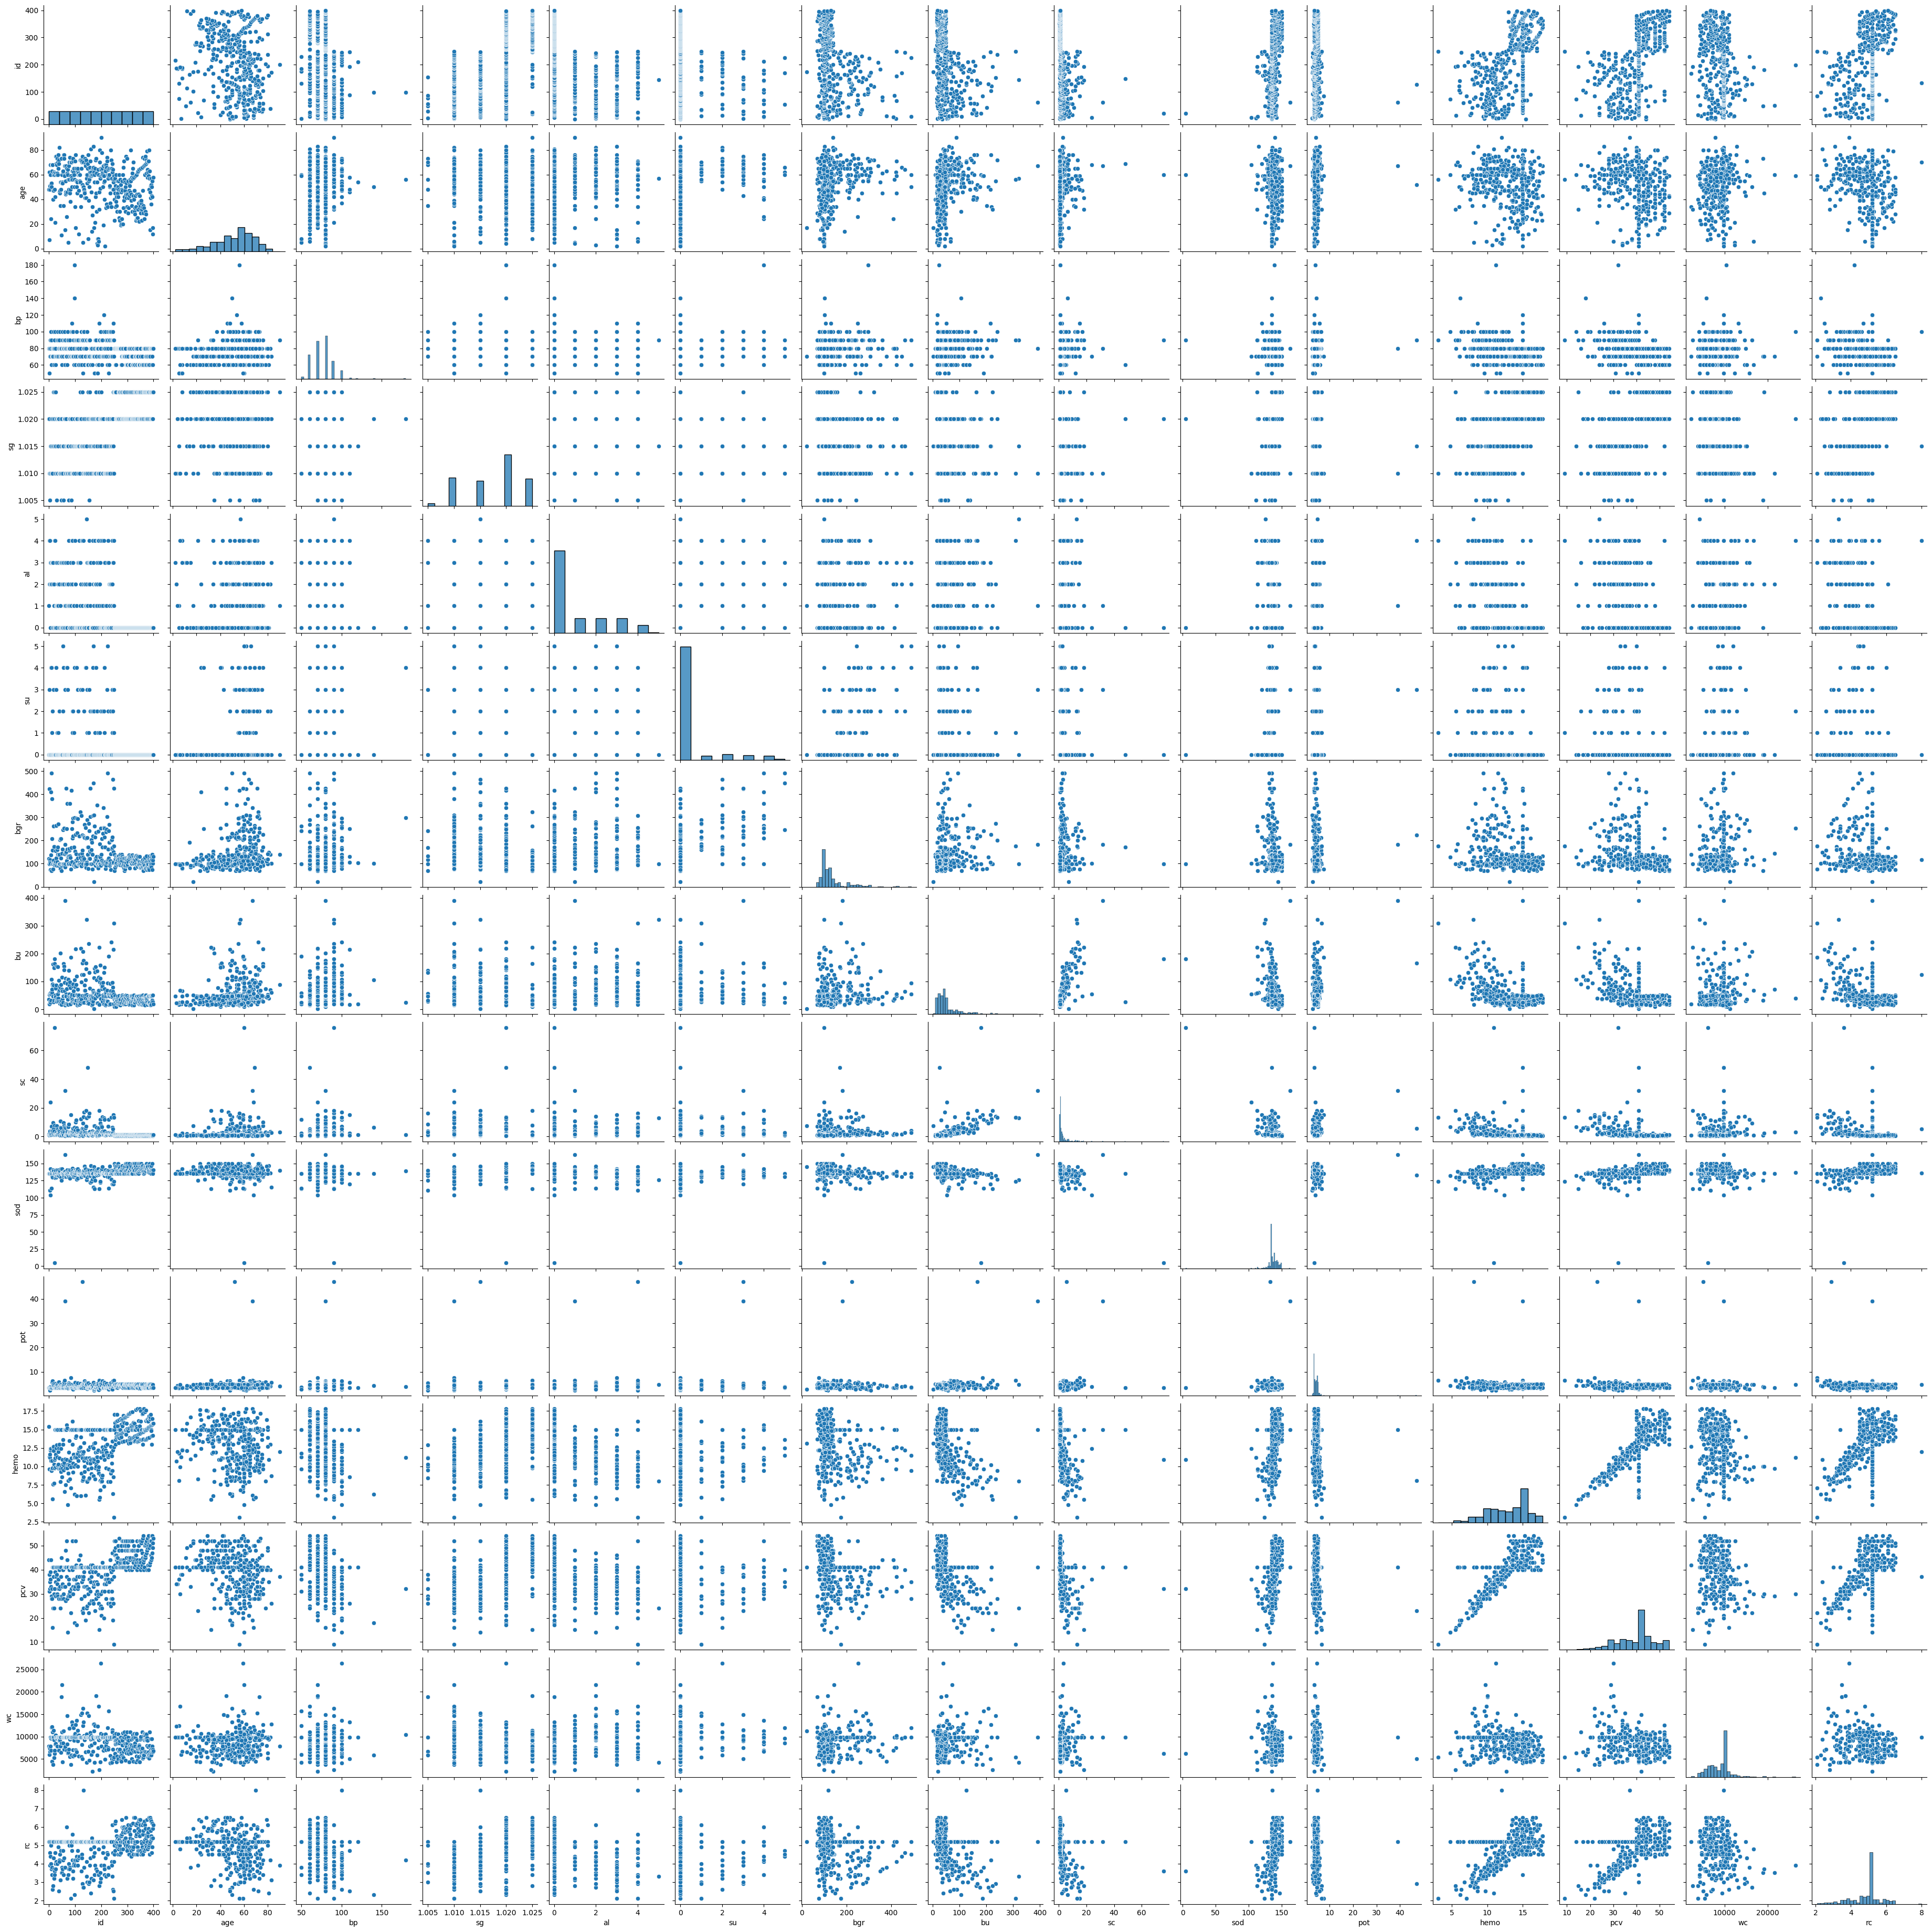

In [25]:
sns.pairplot(df_imputer)

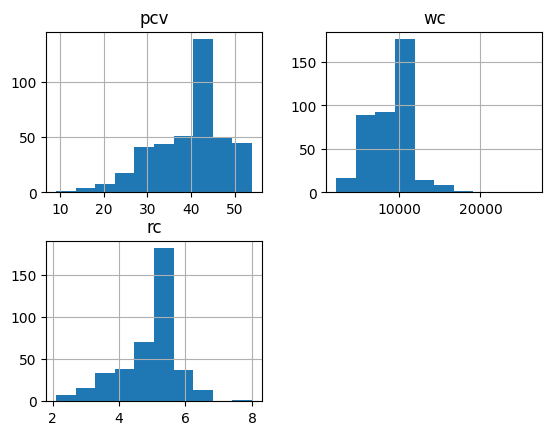

In [26]:
df_imputer.hist()
plt.show()

<Axes: >

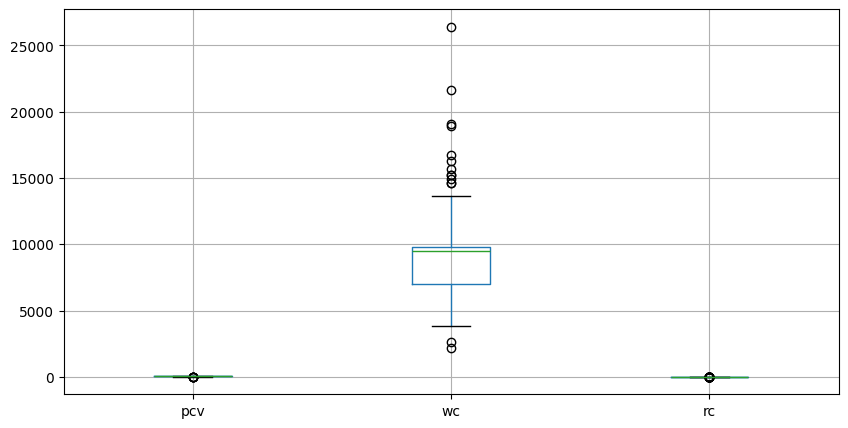

In [27]:
plt.figure(figsize=(10,5))
df_imputer.boxplot()

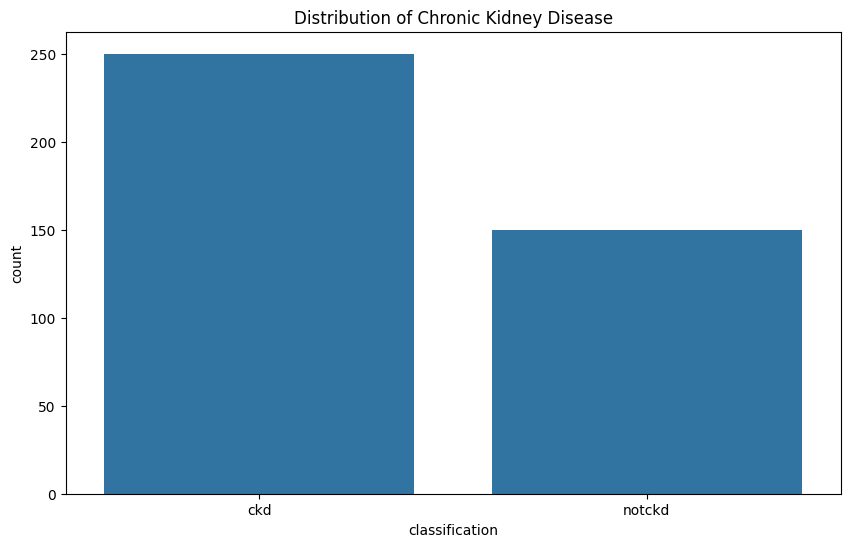

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='classification', data=df_imputer)
plt.title('Distribution of Chronic Kidney Disease')
plt.show()

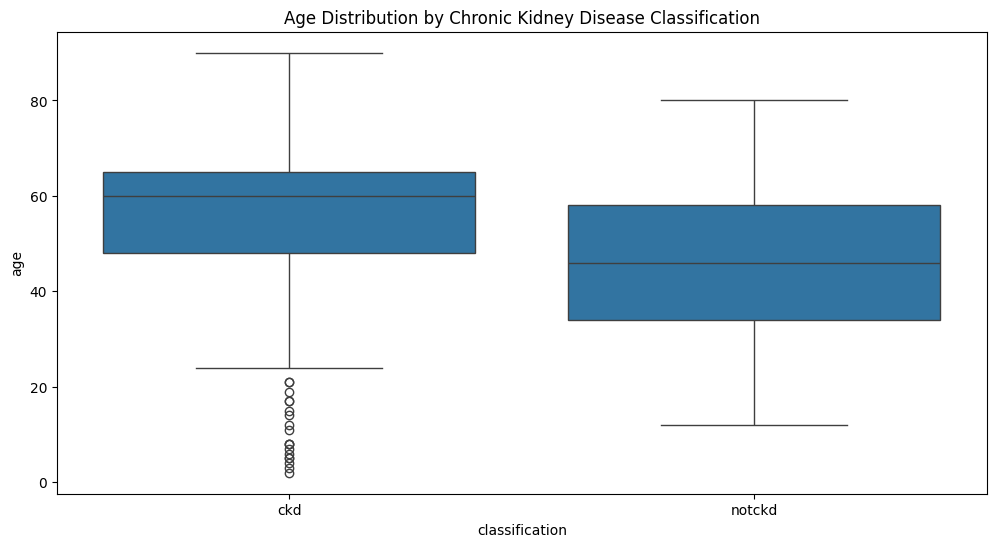

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='age', data=df_imputer)
plt.title('Age Distribution by Chronic Kidney Disease Classification')
plt.show()

# Data Preparation

In [30]:
df_encoded = df_imputer.copy()

In [31]:
le = LabelEncoder()

In [32]:
categorical_cols = ['classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [33]:
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [34]:
# Pisahkan x dan y
X  = df_encoded.drop(columns=(['id', 'classification']))
y = df_encoded['classification']

In [35]:
#  Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [51]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Normalisasi fitur
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [43]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=24))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 691 (2.70 KB)

 Non-trainable params: 60 (240.00 B)

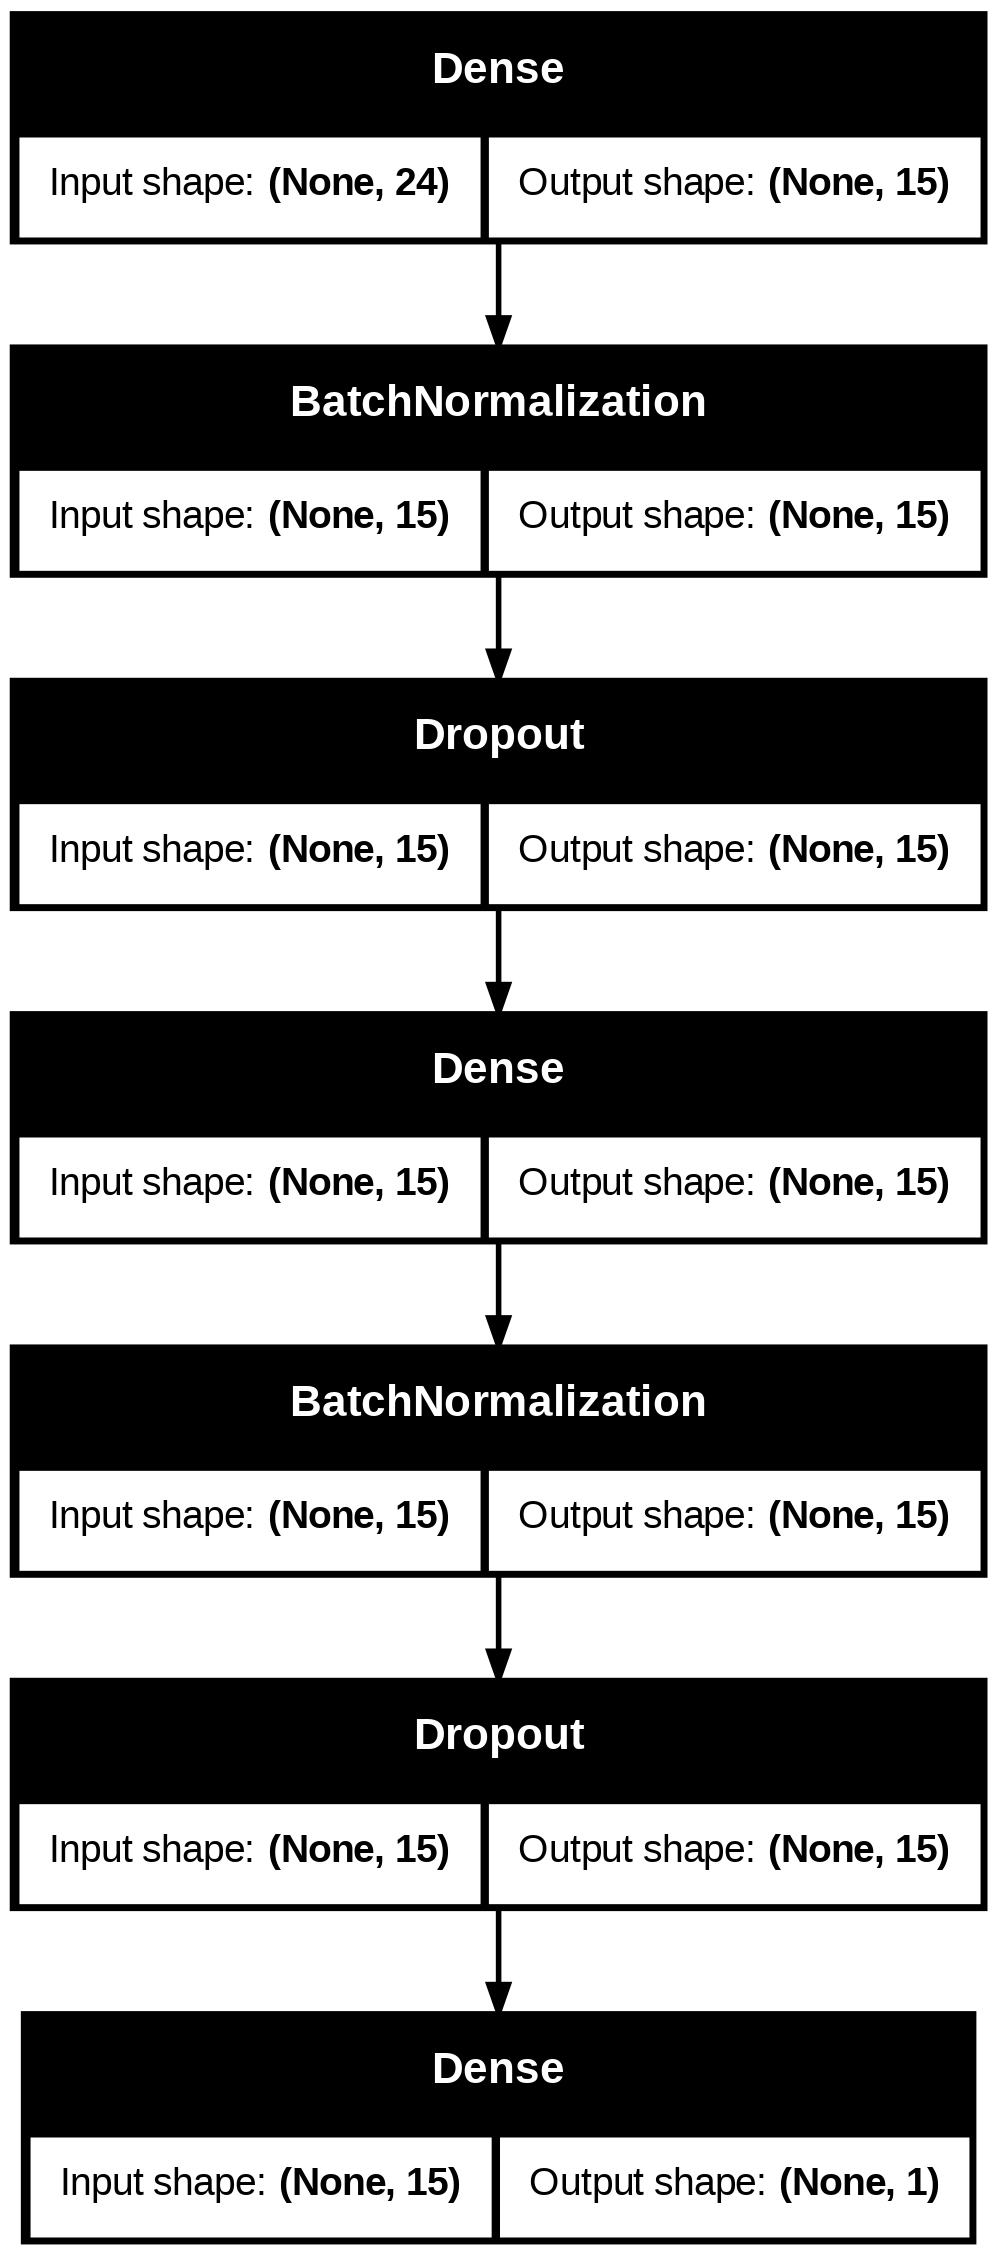

In [46]:
plot_model(model, show_shapes = True)

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss',
                        min_delta=0.0001,
                        patience=20,
                        verbose=1,
                        mode='auto',
                        baseline=None,
                        restore_best_weights=False)

In [53]:
# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), callbacks=callback)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.3928 - loss: 1.2048 - val_accuracy: 0.3375 - val_loss: 0.7485
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4491 - loss: 1.0265 - val_accuracy: 0.4375 - val_loss: 0.6985
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4749 - loss: 0.9083 - val_accuracy: 0.5625 - val_loss: 0.6540
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5129 - loss: 0.8585 - val_accuracy: 0.6750 - val_loss: 0.6140
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6019 - loss: 0.7180 - val_accuracy: 0.7750 - val_loss: 0.5755
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6723 - loss: 0.5916 - val_accuracy: 0.8000 - val_loss: 0.5371
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7248 - loss: 0.5388 - val_accuracy: 0.8375 - val_loss: 0.5045
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7147 - loss: 0.5428 - val_accuracy: 0.8750

# Evaluation


In [54]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")  # Menampilkan akurasi
print(f"Loss Model: {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0179
Akurasi Model: 1.0000
Loss Model: 0.0144


In [55]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

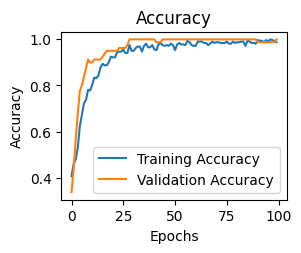

In [56]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

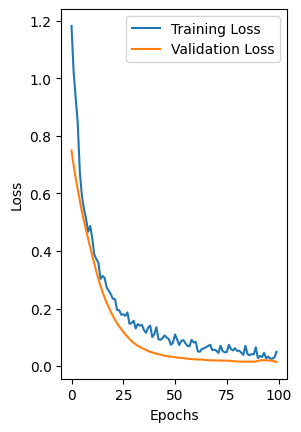

In [57]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [58]:
y_pred = model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_labels))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



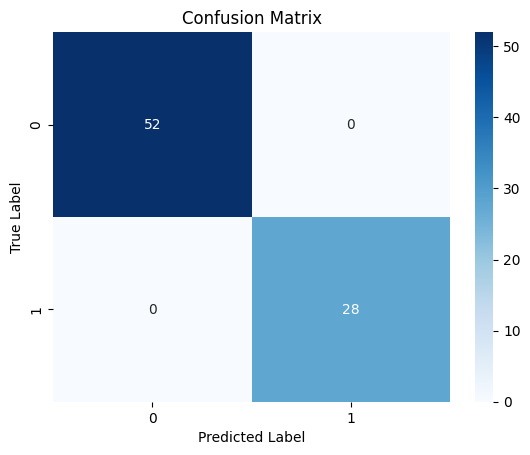

In [59]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Deployment

## Model Simulation

In [60]:
sample_input = np.array([[78, 42 ,42, 20.13, 81.60,	7.62, 262.71]])
sample_input_df = pd.DataFrame(sample_input, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pcv'])

In [61]:
missing_cols = set(X_train.columns) - set(sample_input_df.columns)

In [62]:
for col in missing_cols:
    sample_input_df[col] = 0

In [63]:
sample_input_df = sample_input_df[X_train.columns]


In [64]:
sample_input_scaled = scaler.transform(sample_input_df)

In [65]:
predicted_probability = model.predict(sample_input_scaled)[0][0]
predicted_class = (predicted_probability > 0.5).astype(int)
predicted_disease_kasus = le.inverse_transform([predicted_class])[0]
if predicted_class == 1:
  predicted_disease_kasus = "Terkena Penyakit"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


In [66]:
print(f"Predicted Disease Status: {predicted_disease_kasus}")

Predicted Disease Status: Terkena Penyakit


## Save Model

In [67]:
# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('ckd_model.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpc1wudc1s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 24), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132170325636688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170325638032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170295347344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170295346000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170325637264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170295346768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170295348112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170295350032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170295350224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170295350800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132170295349264: Tensor

In [68]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [69]:
# Download the saved model files
files.download('ckd_model.tflite')
files.download('label_encoder.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>